Let's start with **MathPlotLib**!

In [10]:
# import required modules
import matplotlib.pyplot as plt
import numpy as np

# required for seeing the plot inline
%matplotlib inline

In [9]:
fig = plt.figure() # empty figure, no axes
fig.suptitle('No axes on this figure') # add title

Text(0.5, 0.98, 'No axes on this figure')

<Figure size 640x480 with 0 Axes>

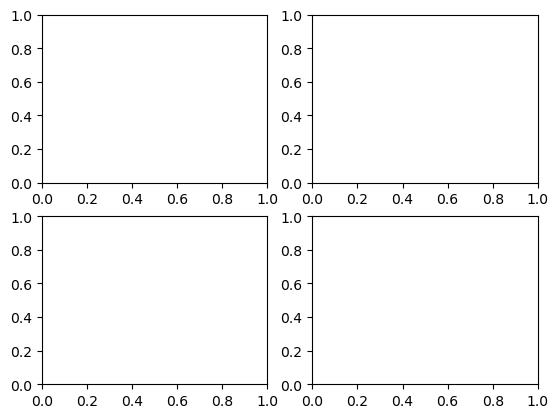

In [11]:
# figure with a 2x2 axes
fig, ax_lst = plt.subplots(2, 2)

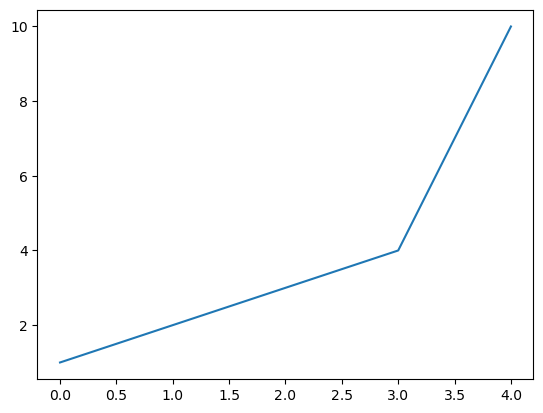

In [13]:
# simple line chart with the provided values on the Y and the number of element starting from 0 on the X
plt.plot([1, 2, 3, 4, 10])
plt.show() # show the plot without the output line

And if I want to print a scatter plot?

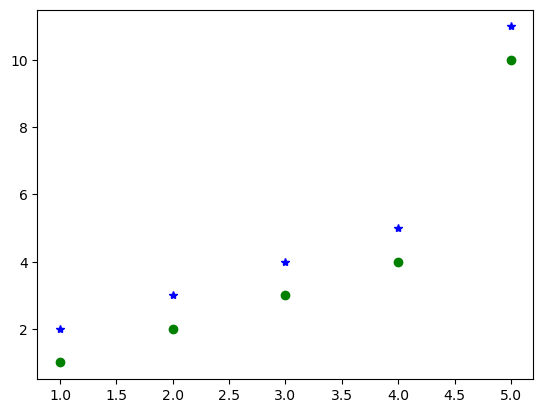

In [15]:
# plot(X, Y, format) where format is {color}{marker}{line}
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 10], 'go') # go = green dots
plt.plot([1, 2, 3, 4, 5], [2, 3, 4, 5, 11], 'b*')
plt.show()

Should be better… we need to add legend, labels and so on.

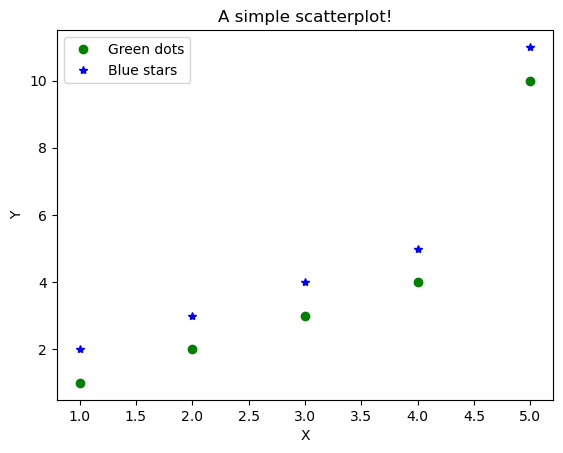

In [16]:
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 10], "go", label = "Green dots")
plt.plot([1, 2, 3, 4, 5], [2, 3, 4, 5, 11], "b*", label = "Blue stars")
plt.title("A simple scatter plot!")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc = "best") # bets location, text comes from label parameters
plt.show()

# other choices for loc are: 'upper right', 'lower right', 'center', 'right', 'center right'

What if we want to increase the size of the plot?

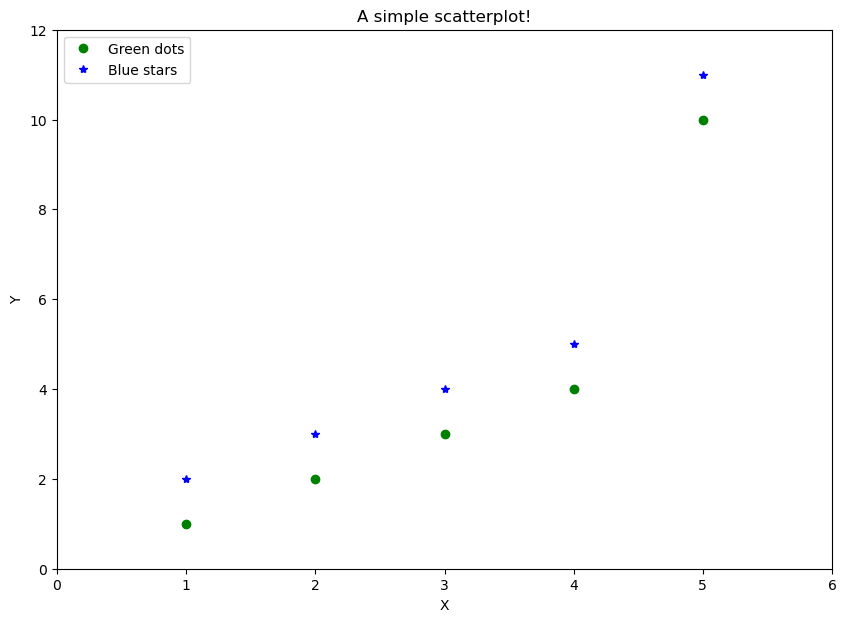

In [19]:
plt.figure(figsize=(10, 7)) # (width, height), figure is the canvas!
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 10], "go", label = "Green dots")
plt.plot([1, 2, 3, 4, 5], [2, 3, 4, 5, 11], "b*", label = "Blue stars")
plt.title("A simple scatter plot!")
plt.xlabel("X")
plt.ylabel("Y")

plt.xlim(0,6) # set the x limit
plt.ylim(0,12) # set the y limit

plt.legend(loc = "best")
plt.show()

How to draw two scatter plots in different panels?

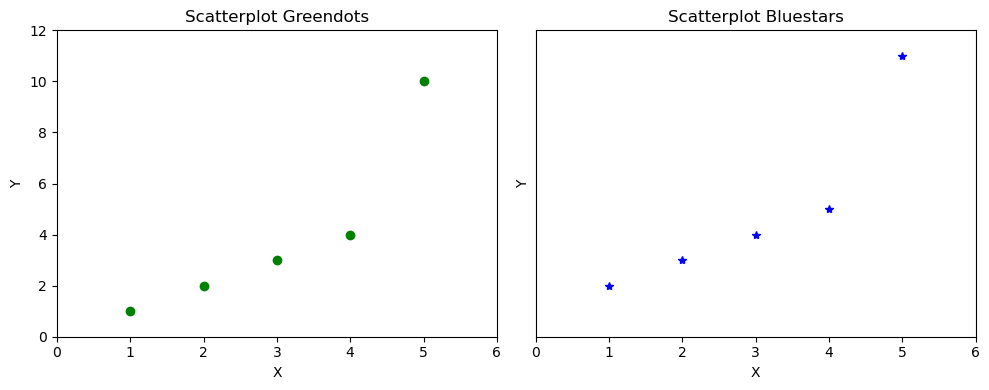

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharey=True, dpi = 100) # subplot(rows, columns) -> share the y axis!

#plot
ax1.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 10], "go") # plot first axes
ax2.plot([1, 2, 3, 4, 5], [2, 3, 4, 5, 11], "b*") # plot second axes

# Title, X and Y labels, X and Y limits
#ax1
ax1.set_title("Scatter-plot Green dots")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_xlim(0,6)
ax1.set_ylim(0,12)
#ax2
ax2.set_title("Scatter plot Blue stars")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_xlim(0, 6)
ax2.set_ylim(0,12)

ax2.yaxis.set_ticks_position('none') # no axis Y ticks on ax2

plt.tight_layout()
plt.show()

Same plot as before, but written in MatLab-like syntax.

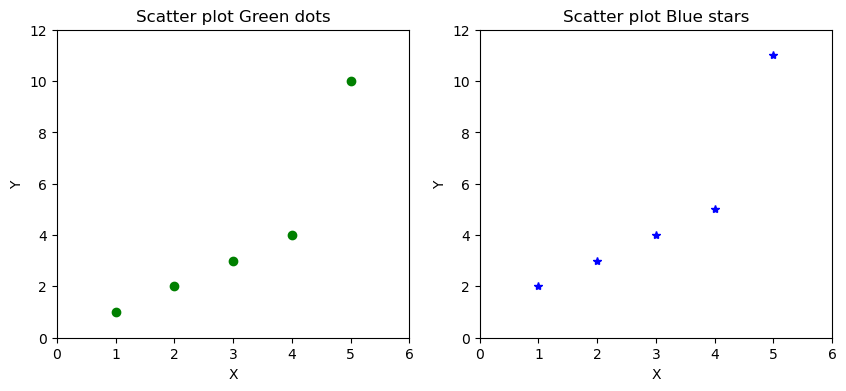

In [24]:
plt.figure(figsize=(10, 4), dpi=100)

plt.subplot(1,2,1) # rows, columns anx actual axes number
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 10], "go")
plt.title("Scatter plot Green dots")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0,6)
plt.ylim(0,12)

plt.subplot(1,2,2) # rows, columns anx actual axes number
plt.plot([1, 2, 3, 4, 5], [2, 3, 4, 5, 11], "b*")
plt.title("Scatter plot Blue stars")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0,6)
plt.ylim(0,12)

plt.show()

Multiple plots with *for* loop.

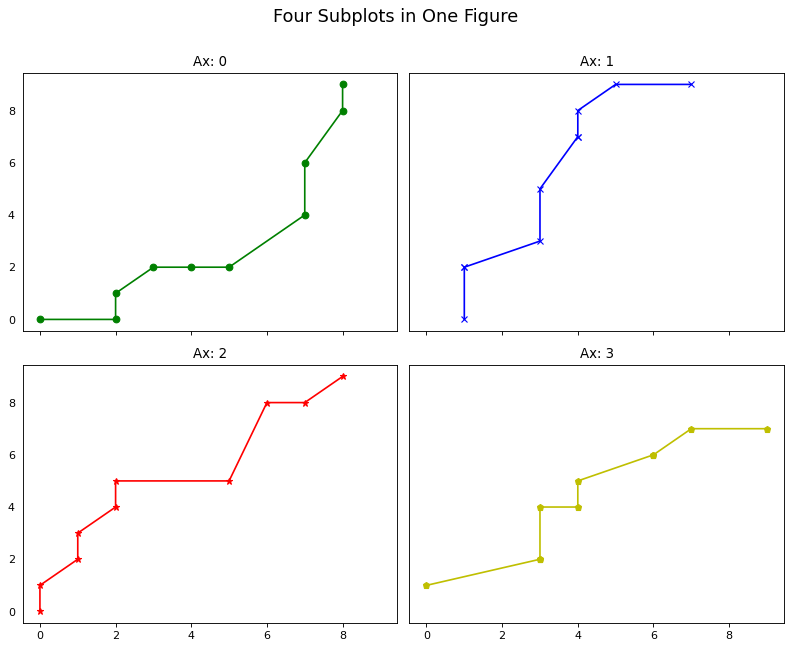

In [27]:
from numpy.random import seed, randint
seed(100)

# create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True, dpi = 80)

# define colors and markers to use
colors = {0:'g', 1:'b', 2:'r', 3:'y'} # green, blue, red, yellow
markers = {0:'o', 1:'x', 2:'*', 3:'p'} # dots, ??, stars, ??

# plot each axes
# ravel() is needed to obtain a one dimensional array from a 2x2 matrix
for i, ax in enumerate(axes.ravel()):
    ax.plot(
        sorted(randint(0, 10, 10)), # gen random values for X
        sorted(randint(0, 10, 10)), # gen random values for Y
        marker = markers[i], # pick colors from the array
        color = colors[i] # pick markers from the array
    )
    ax.set_title('Ax: ' + str(i))
    ax.yaxis.set_ticks_position('none') # remove ticks from Y axis

plt.suptitle('Four Subplots in One Figure',
             verticalalignment='bottom', # keep the plot at the bottom
             fontsize = 16)
plt.tight_layout()
plt.show()

How to modify axis and ticks?

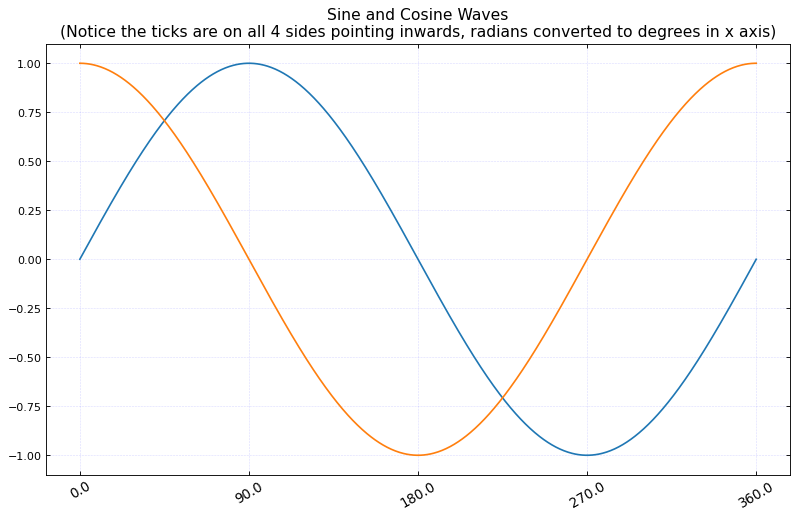

In [30]:
from matplotlib.ticker import FuncFormatter

# custom func to be used as tick labels formatter
def rad_to_degrees(x, pos):
    "converts radians to degrees"
    return round(x * 57.2985, 2)

plt.figure(figsize=(12, 7), dpi=80)
X = np.linspace(0, 2 * np.pi, 1000)
plt.plot(X, np.sin(X))
plt.plot(X, np.cos(X))

# NOTE: 1 radian = 57.2985 degrees

# 1. Adjust x axis ticks
plt.xticks(
    ticks=np.arange(0, 370 / 57.2985, 90 / 57.2985), # calculate where to place the ticks
    fontsize = 12,
    rotation = 30, # rotation in degrees
    ha = "center", # horizontal alignment
    va = "top", # vertical alignment
)

# 2. Ticks parameters
plt.tick_params(
    axis = "both",
    bottom = True,
    top = True,
    left = True,
    right = True,
    direction = "in", # ticks pointing inwards (in, out)
    which = "major",
    grid_color = "blue",
)

# 3. Format tick labels to convert radians to degrees
formatter = FuncFormatter(rad_to_degrees)
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(linestyle="--", linewidth=0.5, alpha=0.15)
plt.title(
    "Sine and Cosine Waves\n(Notice the ticks are on all 4 sides pointing inwards, radians converted to degrees in x axis)",
    fontsize = 14,
)

plt.show()

rcParams are the "matplotlib settings" essentially. By modifying it, we can modify in one shot our plots. Sure rollback function is provided.

In [ ]:
import matplotlib as mtl

mtl.rcParams.update({
    'font.size':18,
    'font.family': 'STIXGeneral',
    'mathtext.fontset': 'Stix'
})

# rollback
# mpl.rcParams.update(mpl.rcParamsDefault)

# pre-built styles
# plt.style.available
# plt.style.use(style)

# colors: check HTML file provided during the lectures

How to customise the legend?

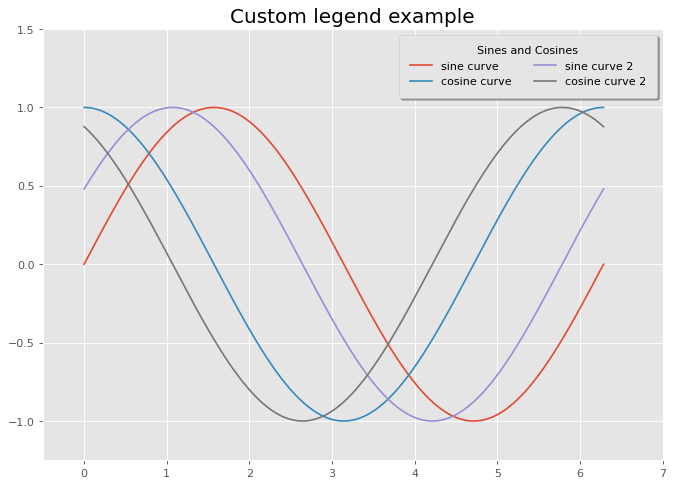

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7), dpi=80)

X = np.linspace(0, 2 * np.pi, 1000)
sine = plt.plot(X, np.sin(X))
cosine = plt.plot(X, np.cos(X))

sine_2 = plt.plot(X, np.sin(X + 0.5))
cosine_2 = plt.plot(X, np.cos(X + 0.5))

plt.gca().set(
    ylim=(-1.25, 1.5),
    xlim=(-0.5, 7)
)

plt.title("Custom legend example", fontsize=18)

# modify legend
plt.legend(
    [sine[0], cosine[0], sine_2[0], cosine_2[0]],
    ["sine curve", "cosine curve", "sine curve 2", "cosine curve 2"],
    frameon=True, # turn on legend border
    framealpha = 1, # transparency of legend border
    ncol = 2, # num of columns
    shadow = True, # turn on shadows
    borderpad = 1, # thickness of the border
    title = "Sines and Cosines", # title of the legend
)

plt.show()

How to add text, arrows and annotations?

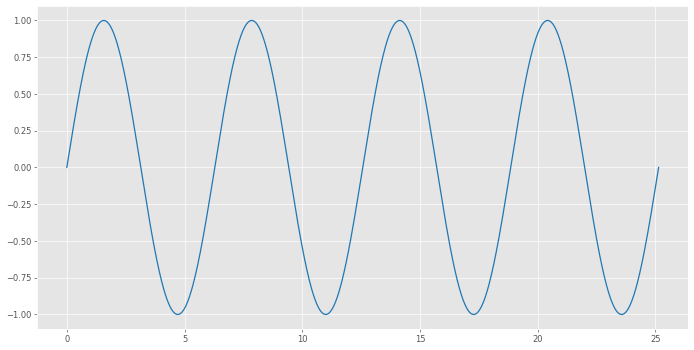

In [32]:
plt.figure(figsize = (14, 7), dpi = 60)
X = np.linspace(0, 8*np.pi, 1000)

# we'll use only a sine function
sine = plt.plot(X, np.sin(X), color='tab:blue')

Text(1.5707217466425822, 1.5, 'Peaks')

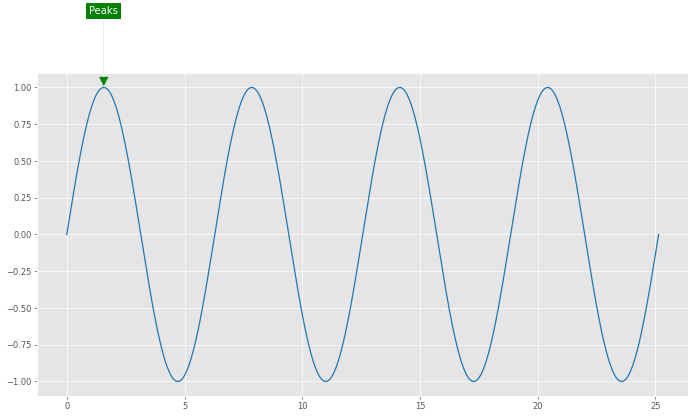

In [34]:
# text, arrows and annotations
plt.figure(figsize=(14,7), dpi=60)
X = np.linspace(0, 8*np.pi, 1000)
sine = plt.plot(X, np.sin(X), color='tab:blue')

# 1. Annotate the 1st peak with arrow props and bbox
plt.annotate(
    'Peaks',
    xy = (90/57.2985, 1.0),
    xytext=(90/57.2985, 1.5),
    bbox = dict(boxstyle = 'square', fc = 'green', linewidth = 0.1),
    arrowprops = dict(facecolor = 'green', shrink = 0.01, width = 0.1),
    fontsize = 12,
    color = 'white',
    horizontalalignment = 'center')

How to customize matplotlib's subplots layout?

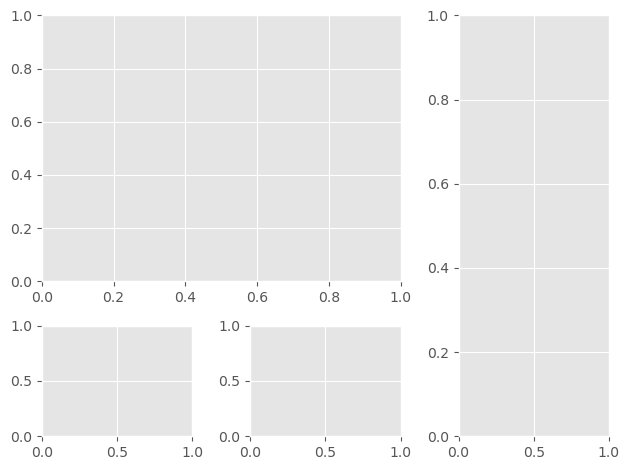

In [37]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=2) # topleft
ax2 = plt.subplot2grid((3,3), (0,2), rowspan=3) # right
ax3 = plt.subplot2grid((3,3), (2,0)) # bottomleft
ax4 = plt.subplot2grid((3,3), (2,1)) # bottom right
fig.tight_layout()

It's time to plot a **scatter plot**!

In [38]:
import pandas as pd

midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


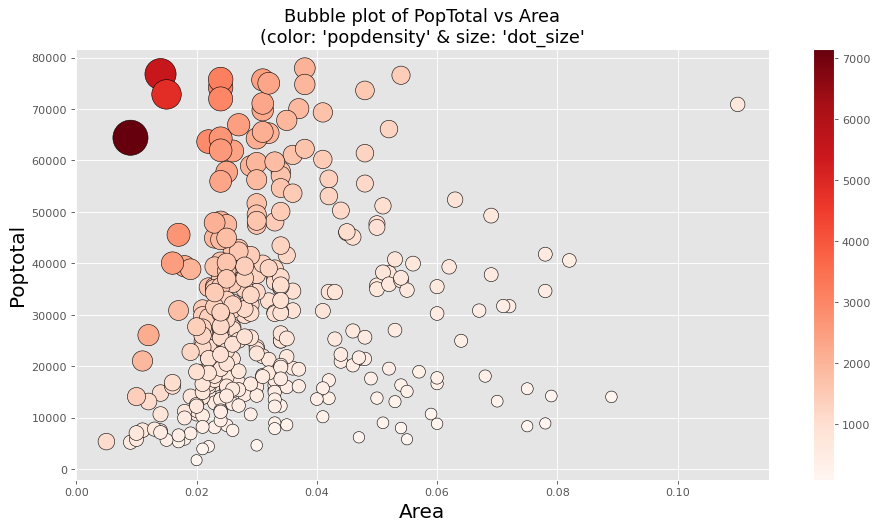

In [39]:
# plot
fig = plt.figure(figsize=(14, 7), dpi = 80, facecolor="w", edgecolor="k")
plt.scatter(
    "area", # x axis
    "poptotal", # y axis
    data = midwest, # midwest data
    s = "dot_size", # size is 'dot_size' column
    c = 'popdensity', # color is 'popdensity' column
    cmap = "Reds",
    edgecolors = "black",
    linewidths = 0.5, # thickness of the line
)

plt.title(
    "Bubble plot of PopTotal vs Area\n(color: 'popdensity' & size: 'dot_size'",
    fontsize = 16
)

plt.xlabel("Area", fontsize = 18)
plt.ylabel("Poptotal", fontsize = 18)
plt.colorbar()
plt.show()

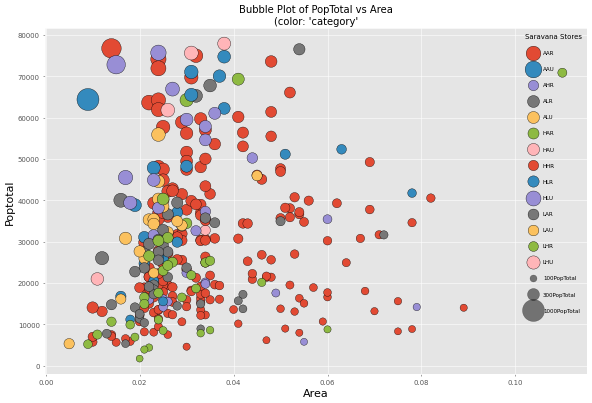

In [41]:
# plot
fig = plt.figure(figsize = (14,9), dpi = 50, facecolor = "w", edgecolor = "k")
colors = plt.cm.tab20.colors # pick tab20 colors
categories = np.unique(midwest["category"]) # pick the values once

for i, category in enumerate(categories):
    plt.scatter(
        "area",
        "poptotal",
        data = midwest.loc[midwest.category == category, :],
        s = "dot_size",
        label = str(category),
        edgecolors = "black",
        linewidths = 0.5,
    )

# legend for size of points
for dot_size in [100, 300, 1000]:
    plt.scatter([], [], c = "k", alpha = 0.5, s = dot_size, label = str(dot_size) + "PopTotal")

plt.legend(
    loc = "upper right",
    scatterpoints = 1,
    frameon = False,
    labelspacing = 2,
    title = "Saravana Stores",
    fontsize = 8,
)

plt.title(
    "Bubble Plot of PopTotal vs Area\n(color: 'category'"
)

plt.xlabel("Area", fontsize = 16)
plt.ylabel("Poptotal", fontsize = 16)
plt.show()
